In [254]:
# Import packages that we will be working with.
import os
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

np.random.seed(10)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [255]:
data=pd.read_csv(r'C:\Users\DELLPC\Desktop\HEART CONDITION PROJECT\HeartCondition\datasets_heart_condition.csv')
print(data.head())

print(data.columns)

print('\n')

print(data.dtypes)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64


In [256]:
print(data.isnull().sum())
data.dropna()
print(data.duplicated(subset= (['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])))

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
568    False
569    False
570    False
571    False
572    False
Length: 573, dtype: bool


In [257]:
data['target'].value_counts()

0    288
1    285
Name: target, dtype: int64

In [258]:
data.shape

(573, 14)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 144x144 with 0 Axes>

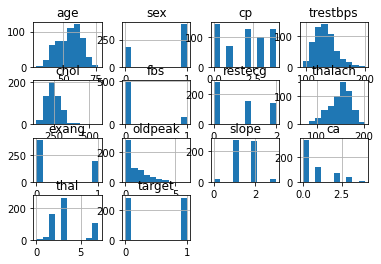

In [259]:
#histograms of dataset

#the plots where we get only 2 bars or 3 are represented as categorical variables and rest as 
#continuous varibles
plt.figure(figsize=(2,2))
data.hist()


<AxesSubplot:>

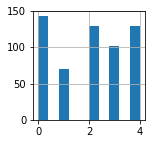

In [260]:
#histograms of particula

plt.figure(figsize=(2,2))
data.cp.hist()

c:\users\dellpc\anaconda3\envs\heart_condition1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dellpc\anaconda3\envs\heart_condition1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dellpc\anaconda3\envs\heart_condition1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

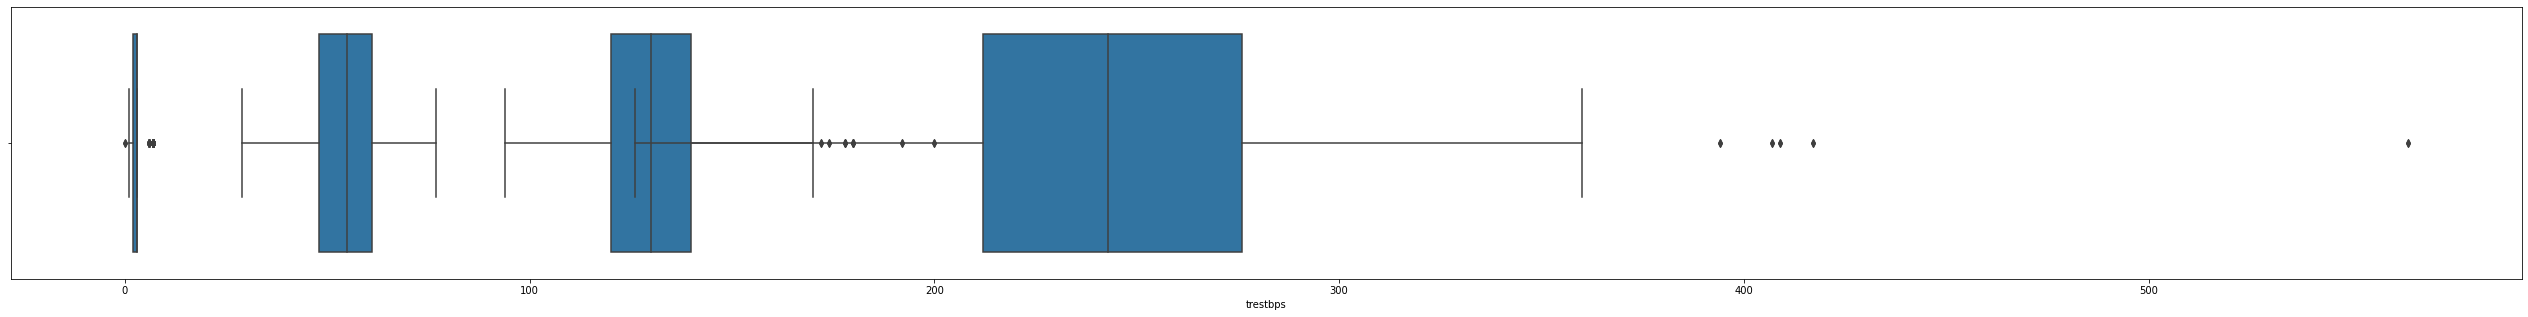

In [261]:
#4 outliers
plt.figure(figsize=(45,5))

sns.boxplot(data["age"])
print('\n')

sns.boxplot(data["chol"])

print('\n')

sns.boxplot(data["thal"])

print('\n')

sns.boxplot(data["trestbps"])
plt.show()
plt.show()

<AxesSubplot:>

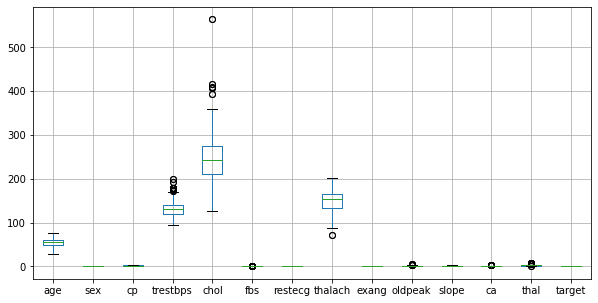

In [262]:
plt.figure(figsize=(10,5))
data.boxplot()

In [263]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,54.397906,0.680628,2.006981,131.492147,247.863874,0.148342,0.760908,149.661431,0.328098,1.044503,1.486911,0.701571,3.436300,0.497382
std,9.086923,0.466641,1.484166,17.676345,51.745264,0.355749,0.821737,23.008144,0.469931,1.152631,0.621795,0.985887,1.840172,0.500430
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


[Text(0, 0, 'heart disease absent'), Text(1, 0, 'heart disease present')]

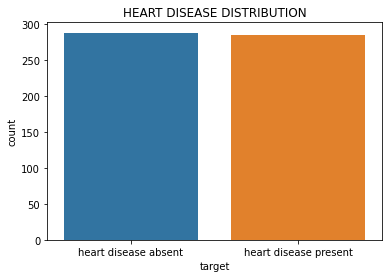

In [285]:
#distribution of the data with and without heart disease
#i.e with the target

plotting=sns.countplot(x='target' ,data=data)
plotting.set_title('HEART DISEASE DISTRIBUTION')

#labels for sticking for x axis
plotting.set_xticklabels(['heart disease absent','heart disease present'])

# the data provides info that no.of people having heart disease and without heart disease are at the same level

[Text(0, 0, 'heart disease present'), Text(1, 0, 'heart disease absent')]

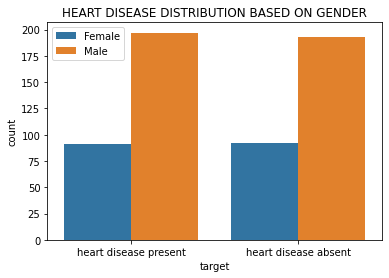

In [265]:
#distribution of data with respect to gender(male and female) having and not having heart disease

plotting1=sns.countplot(x='target',data=data,hue='sex')

plotting1.set_title('HEART DISEASE DISTRIBUTION BASED ON GENDER')

plotting1.legend(['Female','Male'])

plotting1.set_xticklabels(['heart disease present','heart disease absent'])


# data provides an interpretation that number of both males and females having or not having heart disease are a

#at the same level

# equal number of males are having high chance of heart disease and also not having heart disease than females

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

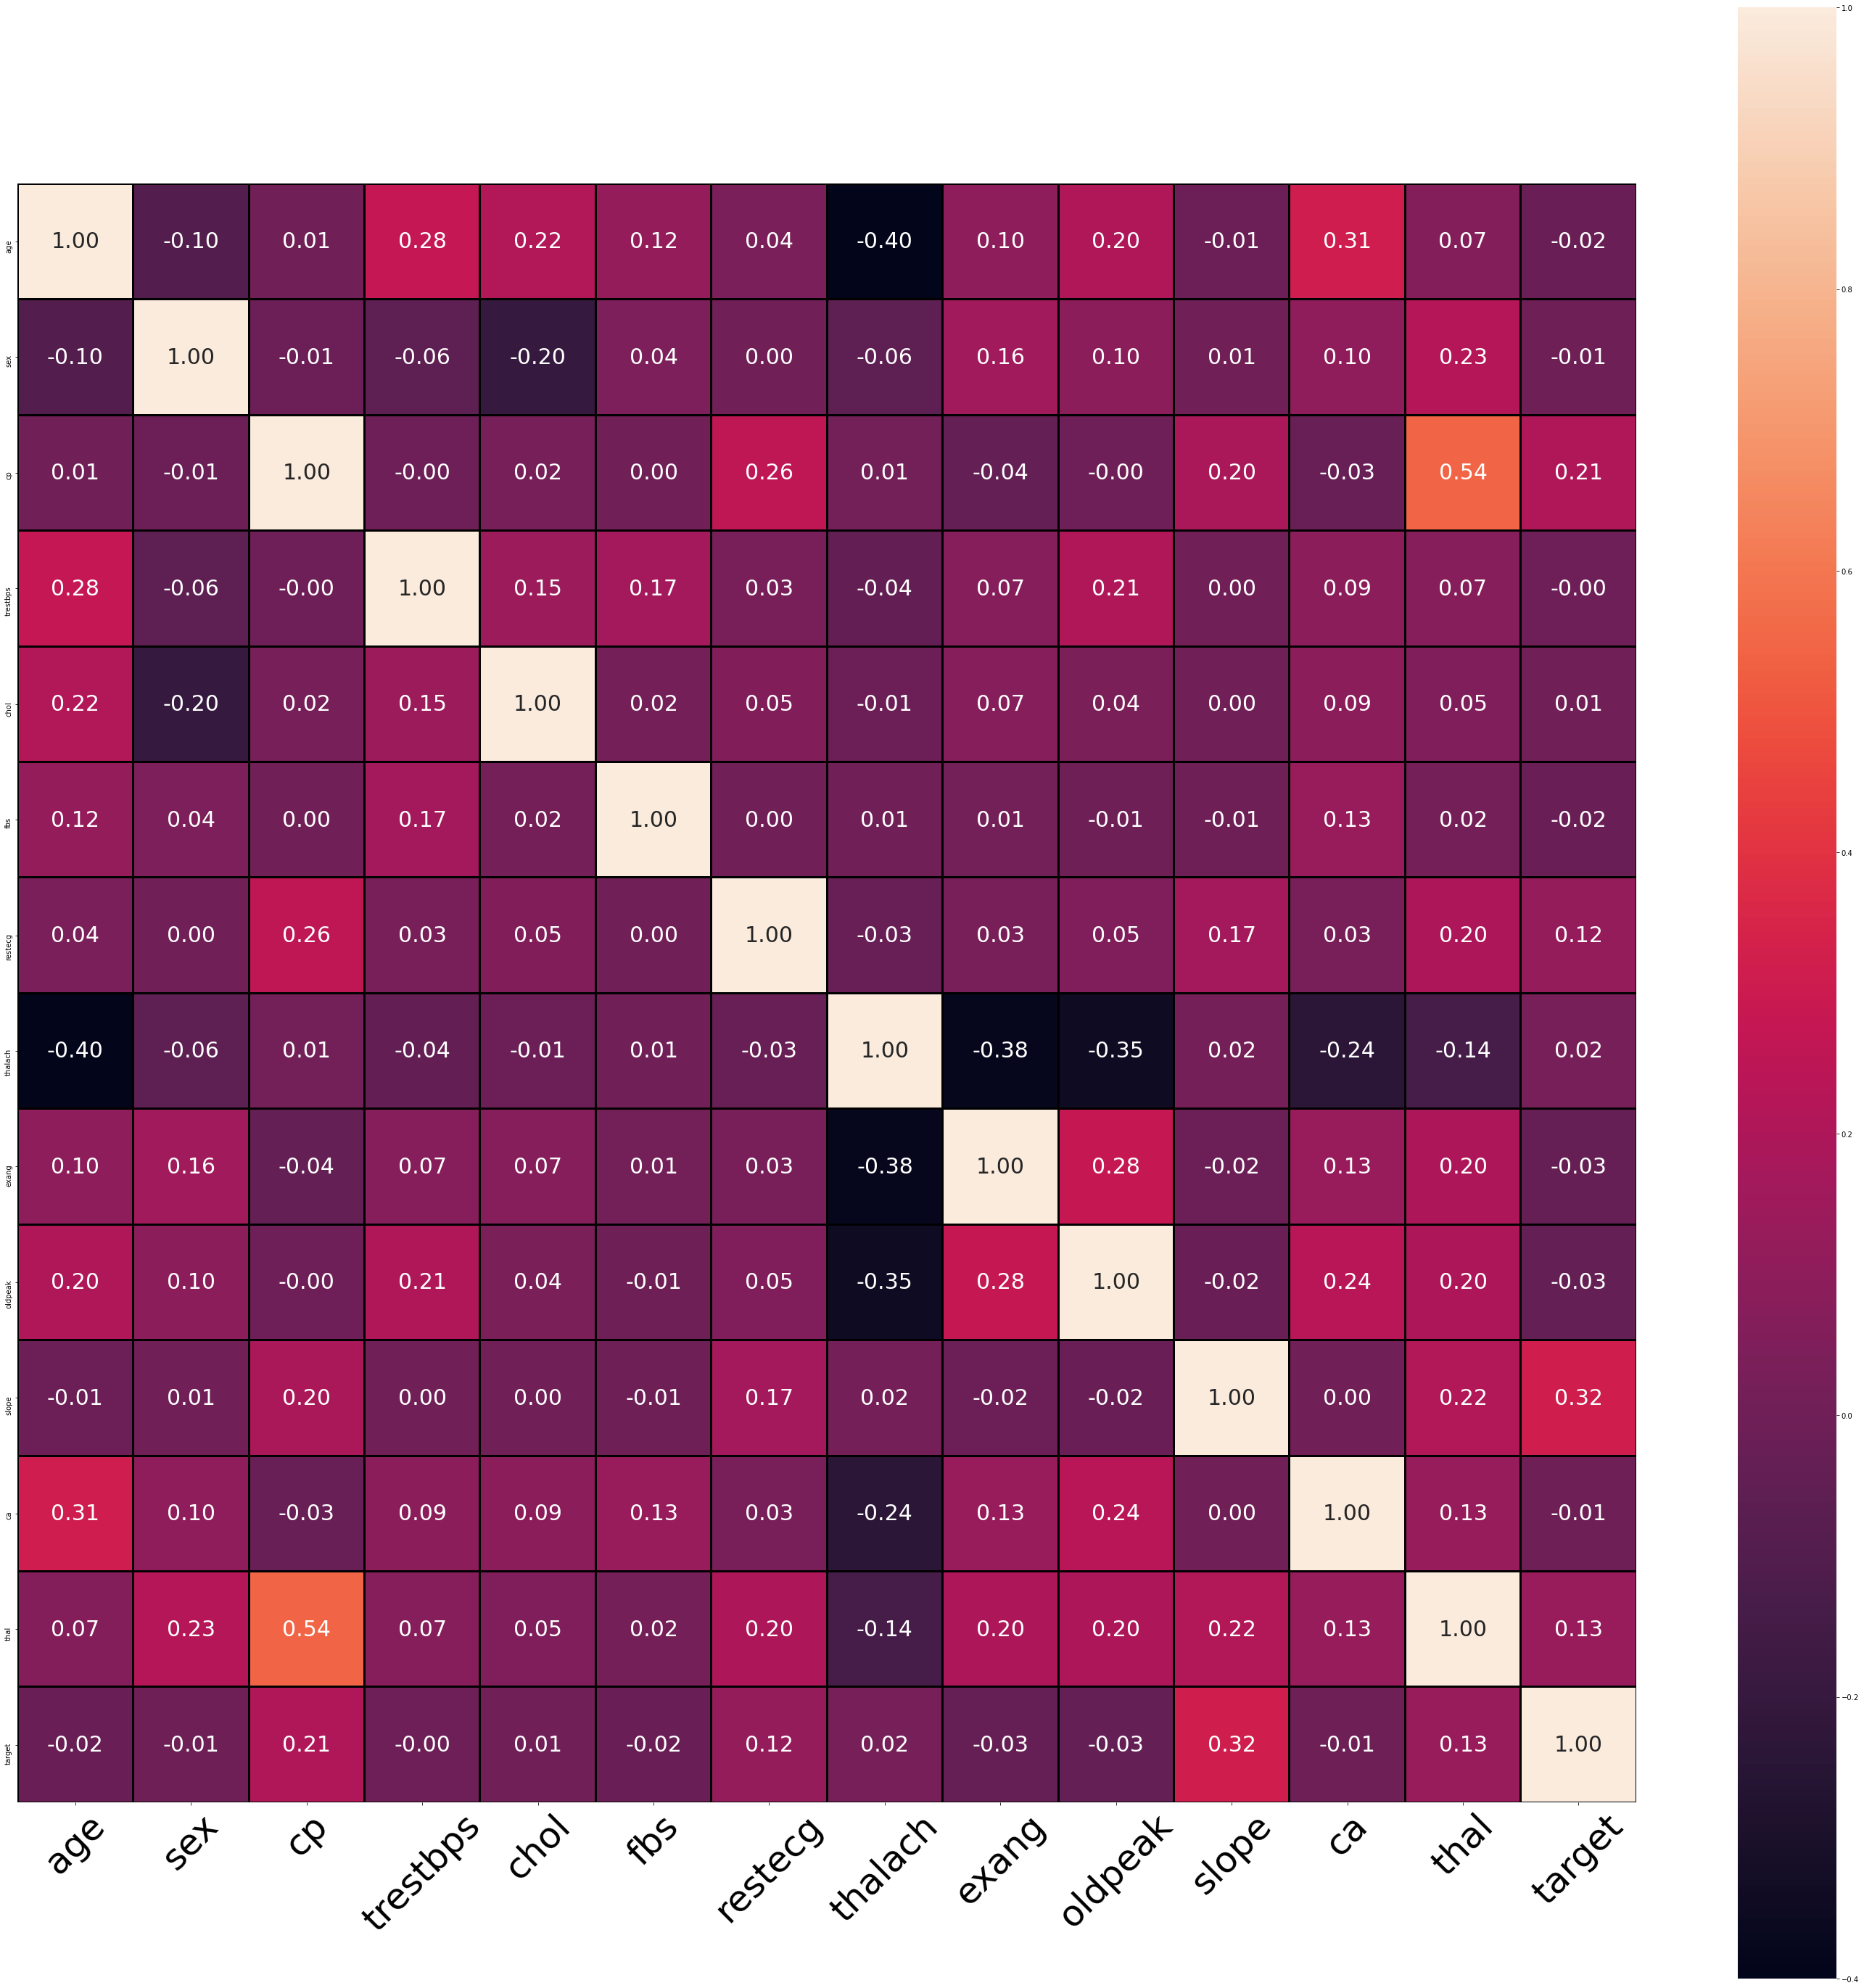

In [266]:
#plt.figure(figsize=(50, 50))
plt.rcParams["figure.figsize"] = (50,50)
heat_map=sns.heatmap(data.corr(method='pearson'),annot=True,fmt='.2f',linewidth=2,linecolor='black',square=True,annot_kws={'fontsize': 30})
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45,fontsize=50)


#no values =1 so no strong corelations

In [267]:
#creating training and test data

X=np.array(data.drop(['target'],1))

print(X.shape)
y=np.array(data['target'])
print(y.shape)

(573, 13)
(573,)


In [268]:
#standaradising by z score formula: (X-mean)/std

mean=X.mean(axis=0)
X-=mean
std=X.std(axis=0)
X/=std

In [269]:
X[0]

array([ 0.9474726 ,  0.68500421,  0.66966021,  0.76484453, -0.2875019 ,
        2.39607522, -0.92678313,  0.01472804, -0.69879302,  1.09019666,
       -2.39340951, -0.7122355 , -1.32510932])

In [270]:
#train and test split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=43,test_size=0.2)



In [271]:
y_train.shape
print(y_train[:10])

[1 1 1 0 0 0 1 1 1 0]


In [272]:
#converting y _train and y_tset into categorical
from keras.utils.np_utils import to_categorical

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

print(Y_train.shape)
print(Y_train[:10])
print('\n')
print(X_train[0])


(458, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


[-1.25541562  0.68500421 -1.35344331 -0.93382181  1.06646089 -0.41734917
  0.29121397  1.36325429 -0.69879302  0.13502436 -0.78375734 -0.7122355
 -0.781207  ]


In [273]:
y_train[y_train>0]=1
y_test[y_test>0]=1

print(y_train[:20])

[1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0]


In [274]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0]


In [275]:
#creating model and training the model



def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(16, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 32)                448       
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_30 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
None


In [276]:
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=100, batch_size=10)

Train on 458 samples, validate on 115 samples
Epoch 1/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6938 - acc: 0.5175 - val_loss: 0.6871 - val_acc: 0.6696
Epoch 2/100
458/458 [==============================] - 0s 231us/step - loss: 0.6813 - acc: 0.6528 - val_loss: 0.6720 - val_acc: 0.6783
Epoch 3/100
458/458 [==============================] - 0s 200us/step - loss: 0.6551 - acc: 0.6834 - val_loss: 0.6398 - val_acc: 0.7043
Epoch 4/100
458/458 [==============================] - 0s 223us/step - loss: 0.6196 - acc: 0.7183 - val_loss: 0.6054 - val_acc: 0.6957
Epoch 5/100
458/458 [==============================] - 0s 214us/step - loss: 0.5855 - acc: 0.7162 - val_loss: 0.5796 - val_acc: 0.6957
Epoch 6/100
458/458 [==============================] - 0s 212us/step - loss: 0.5689 - acc: 0.7293 - val_loss: 0.5627 - val_acc: 0.7043
Epoch 7/100
458/458 [==============================] - 0s 204us/step - loss: 0.5526 - acc: 0.7402 - val_loss: 0.5382 - val_acc: 0.7478
Epoch 8/100

Epoch 61/100
458/458 [==============================] - 0s 209us/step - loss: 0.3699 - acc: 0.8537 - val_loss: 0.4308 - val_acc: 0.8522
Epoch 62/100
458/458 [==============================] - 0s 203us/step - loss: 0.3459 - acc: 0.8646 - val_loss: 0.4253 - val_acc: 0.8609
Epoch 63/100
458/458 [==============================] - 0s 199us/step - loss: 0.3709 - acc: 0.8712 - val_loss: 0.4249 - val_acc: 0.8435
Epoch 64/100
458/458 [==============================] - 0s 214us/step - loss: 0.3581 - acc: 0.8537 - val_loss: 0.4234 - val_acc: 0.8609
Epoch 65/100
458/458 [==============================] - 0s 196us/step - loss: 0.3528 - acc: 0.8668 - val_loss: 0.4238 - val_acc: 0.8609
Epoch 66/100
458/458 [==============================] - 0s 195us/step - loss: 0.3463 - acc: 0.8493 - val_loss: 0.4293 - val_acc: 0.8696
Epoch 67/100
458/458 [==============================] - 0s 201us/step - loss: 0.3702 - acc: 0.8493 - val_loss: 0.4288 - val_acc: 0.8522
Epoch 68/100
458/458 [==========================

In [277]:
binary_model.save("heart_condition.h5")
print("Saved model to disk")

Saved model to disk


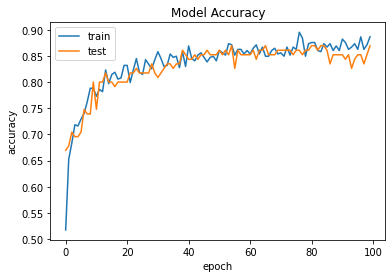

In [278]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

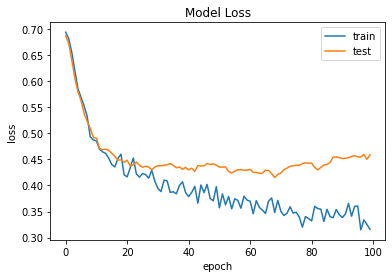

In [279]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [280]:
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8695652173913043
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        62
           1       0.88      0.83      0.85        53

    accuracy                           0.87       115
   macro avg       0.87      0.87      0.87       115
weighted avg       0.87      0.87      0.87       115



In [281]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
print('CONFUSION MATRIX')

predictions=binary_model.predict(X_test)
predictions= (predictions > 0.5)

confmatrix=confusion_matrix(Y_test_binary,predictions)
print(confmatrix)


CONFUSION MATRIX
[[56  6]
 [ 9 44]]
